# SIT307: MACHINE LEARNING

## TASK 7.2HD
## Comparison of Machine Learning Algorithms for the Power Consumption Prediction : Case Study of Tetouan city

### Name: Aryan Vadera
### ID: 222502768

---

## Introduction

The goal of this Jupyter notebook is to reproduce the findings of Abdulwahed Salam and Abdelaaziz El Hibaoui's work, "Comparison of Machine Learning Algorithms for the Power Consumption Prediction - Case Study of Tetouan City". The notebook assesses how well different machine learning models—Random Forest, Decision Tree, Support Vector Regression, Feedforward Neural Network, and Linear Regression—predict power consumption based on an extensive dataset by adhering to the methodology, hyperparameters, and performance metrics described in the original study.

---

## Installing and Importing Libraries

Installing and importing the required libraries for the analysis. This code block contains libraries for deep learning (TensorFlow and Keras), machine learning models (Scikit-learn), and data manipulation (Pandas). The tools needed for processing data, training models, fine-tuning hyperparameters, and assessing performance are provided by these libraries.

In [4]:
# Installing and importing all the necessary libraries
!pip3 install tensorflow
!pip3 install keras
!pip3 install pandas
!pip3 install numpy
!pip3 install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app

/Users/s222502768/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Loading the Dataset

In [5]:
# Loading the dataset
file_path = '/Users/s222502768/Desktop/sit307/data.csv'
data = pd.read_csv(file_path)
print(data.head)


<bound method NDFrame.head of                DateTime  Temperature  Humidity  Wind Speed  \
0         1/1/2017 0:00        6.559      73.8       0.083   
1         1/1/2017 0:10        6.414      74.5       0.083   
2         1/1/2017 0:20        6.313      74.5       0.080   
3         1/1/2017 0:30        6.121      75.0       0.083   
4         1/1/2017 0:40        5.921      75.7       0.081   
...                 ...          ...       ...         ...   
52411  12/30/2017 23:10        7.010      72.4       0.080   
52412  12/30/2017 23:20        6.947      72.6       0.082   
52413  12/30/2017 23:30        6.900      72.8       0.086   
52414  12/30/2017 23:40        6.758      73.0       0.080   
52415  12/30/2017 23:50        6.580      74.1       0.081   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
0                      0.051          0.119               34055.69620   
1                      0.070          0.085               29814.68354   
2     

## Extracting Features and Target Variable

The features and the target variable are extracted from the dataset by this code block. The goal variable is the total power consumption over the three zones; the features include weather and calendar attributes. This distinction is required for training and evaluating the model.

In [6]:
# Extracting features and target variable
features = data.drop(columns=['DateTime', 'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption'])
target = data[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].sum(axis=1)


## Data Normalisation

By scaling the feature values between 0 and 1, normalisation ensures that each feature contributes equally to the training of the model and keeps any one feature from predominating because of its size.

In [7]:
# Normalizing the data using Min-Max Normalization
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


## Splitting Data

This code block uses a 75/25 ratio to divide the normalised dataset into training and testing sets. The testing set is used to assess the models' performance after they have been trained using the training set. The data split ensures that the models are evaluated on data that they haven't seen during training.

In [8]:
# Splitting the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.25, random_state=42)


## This code block achieves the following - 
### HyperParameters
### Initialisation and Training of Models
### Grid Search and Tuning

To determine the ideal hyperparameters for the models that need to be tuned, this code block uses grid search. Using cross-validation data, GridSearchCV is used to assess various hyperparameter combinations and determine which estimator is optimal for each model.

The hyperparameter grids for the Random Forest, Decision Tree, and Support Vector Regression models are defined. The range of hyperparameters to be investigated during grid search is specified by these grids.

This code block uses Keras to define and train a feedforward neural network. An input layer, an output layer, and a hidden layer with ten neurones with SELU activation make up the network. The model is trained for 100 iterations using the Adam optimizer and mean squared error loss.

In [9]:
# Defining hyperparameter grids for models that require tuning
# The folling hyper parameters have been taken from the study provided
hyperparameter_grids = {
    "RandomForest": {
        'n_estimators': [10, 20, 30, 50, 100, 200, 300],  # Number of trees in the forest
        'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],  # Maximum features needed at every split
        'min_samples_split': [2],  # Minimum samples required to split internal node
        'min_samples_leaf': [1]  # min samples for leaf node
    },
    "DecisionTree": {
        'max_depth': [None],  # Maximum depth of the decision tree
        'min_samples_split': [10],  # Minimum number of samples required to split internal node
        'min_samples_leaf': [10],  # Minimum number of samples required to be at a leaf node
        'max_features': [9]  # Max features for each split
    },
    "SVR": {
        'C': [1, 10, 100, 1000],  # Regularization parameter
        'gamma': [0.01, 0.001, 0.0001]  # Kernel coefficients
    }
}

# Initialize base models
initial_models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "LinearRegression": LinearRegression()
}

# Performing grid search to find the best hyperparameters for the models that require tuning
trained_models = {}
for model_name, params in hyperparameter_grids.items():
    # Initializinh GridSearchCV with the model and its hyperparameters
    grid_search = GridSearchCV(estimator=initial_models[model_name], param_grid=params, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    # fit model on training data
    grid_search.fit(X_train, y_train)
    # best eliminator according to grid search
    trained_models[model_name] = grid_search.best_estimator_

# For Linear Regression - directly fit the model without hyperparameter tuning
trained_models["LinearRegression"] = initial_models["LinearRegression"].fit(X_train, y_train)

# Definng and training FFNN with keras
neural_network = Sequential()
neural_network.add(Dense(10, input_dim=X_train.shape[1], activation='selu'))  # Hidden layer with 10 neurons and SELU activation
neural_network.add(Dense(1))  # Output layer that has 1 neuron
adam_optimizer = Adam(learning_rate=0.001)  # optimizer
neural_network.compile(loss='mean_squared_error', optimizer=adam_optimizer)  # Compilinh model with MSE loss and Adam optimizer
neural_network.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)  # Training model - 100 epochs and batch size: 10

/Users/s222502768/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/s222502768/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## This code achieves the following:

### Evaluation of Model Performance
A function to calculate the RMSE and MAE for a given model is defined in this code block. After that, it assesses each trained model's performance on the training and testing sets, recording the findings in a dictionary. This assessment sheds light on each model's accuracy and degree of error.

### Displaying Performance Metrics
The performance metrics (RMSE and MAE) for each model across the various distributions (Quads, Smir, Boussafou, Aggregated) are created and shown in a table by this code block. The models' performance is visually compared in the table, showcasing both their advantages and disadvantages.

1229/1229 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


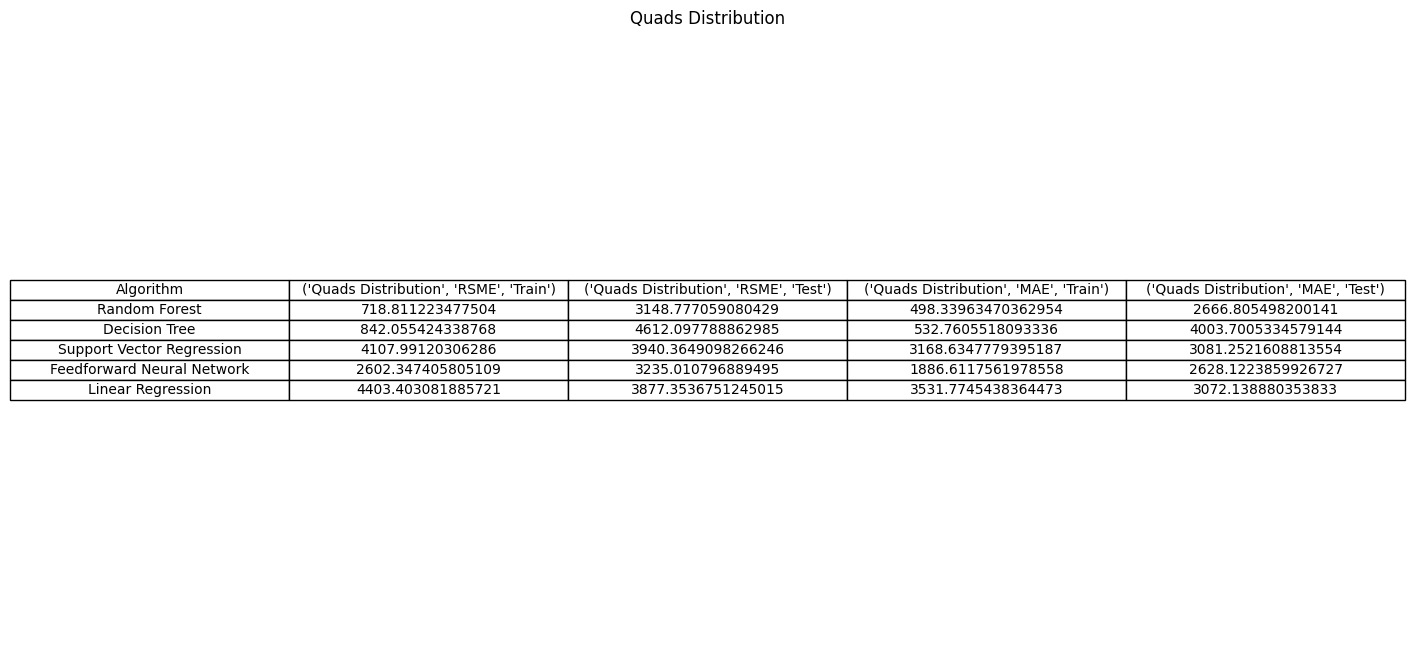

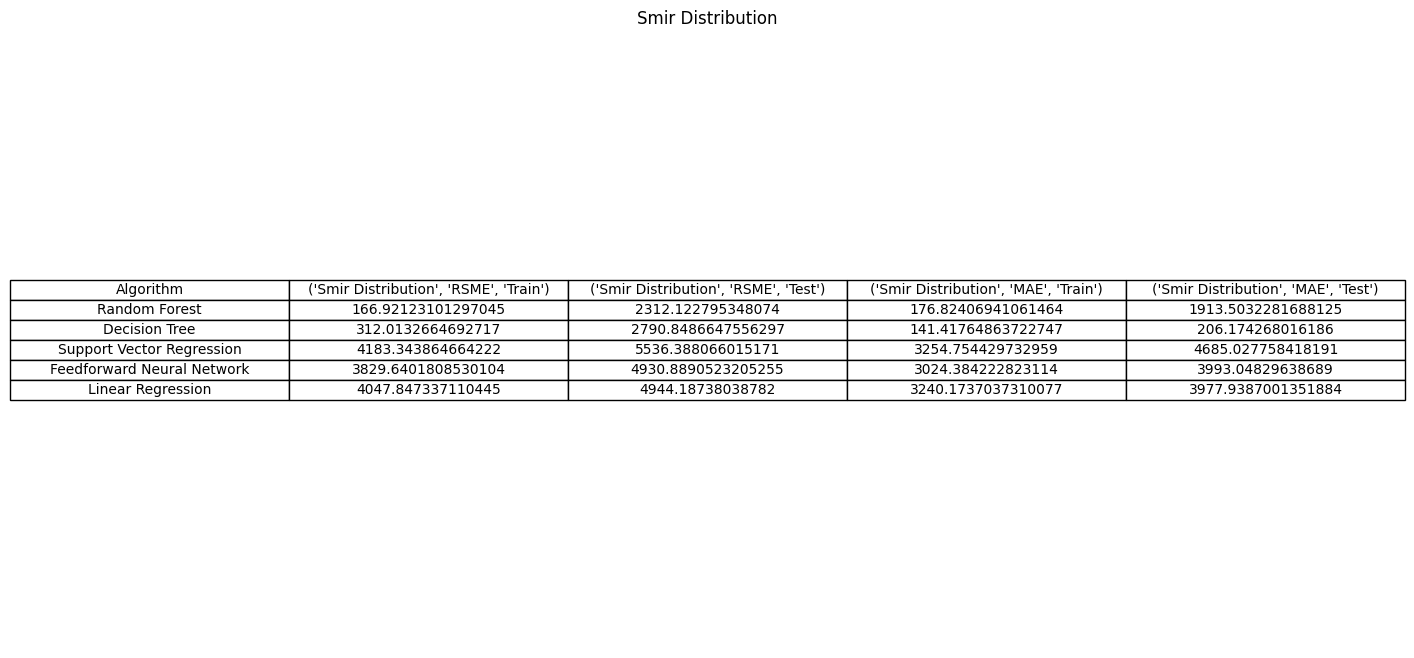

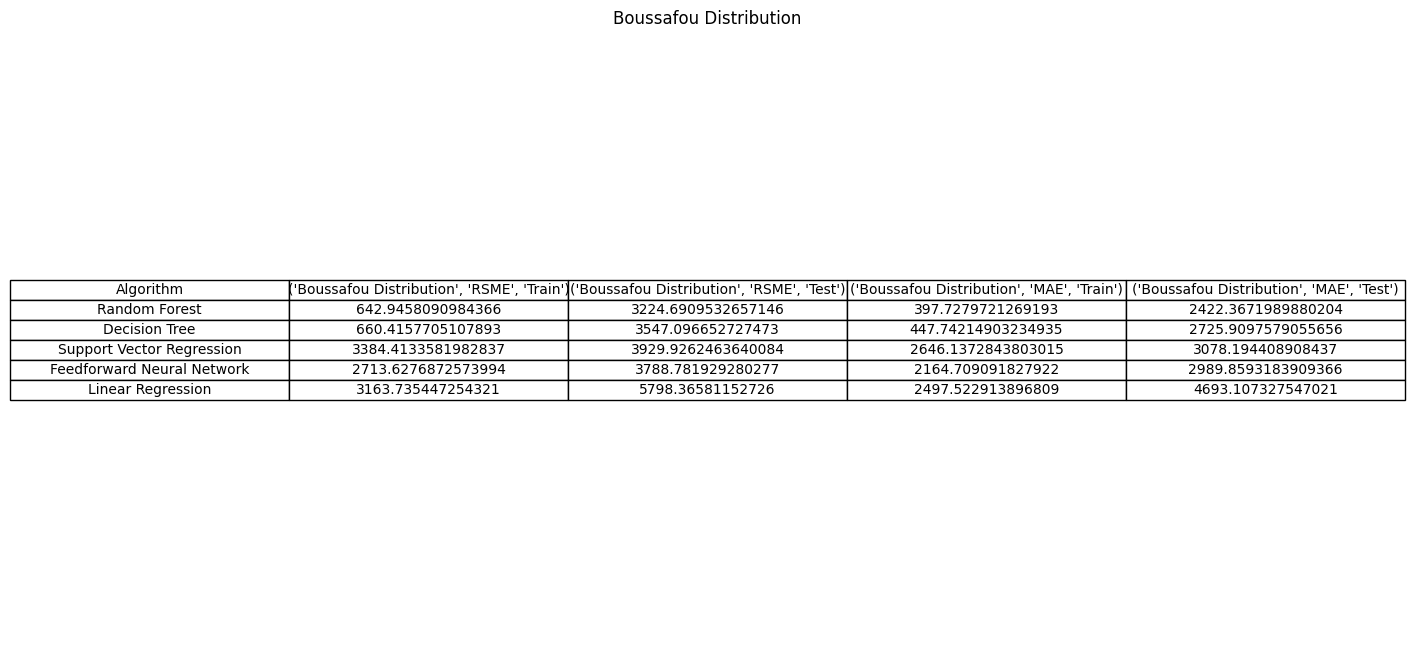

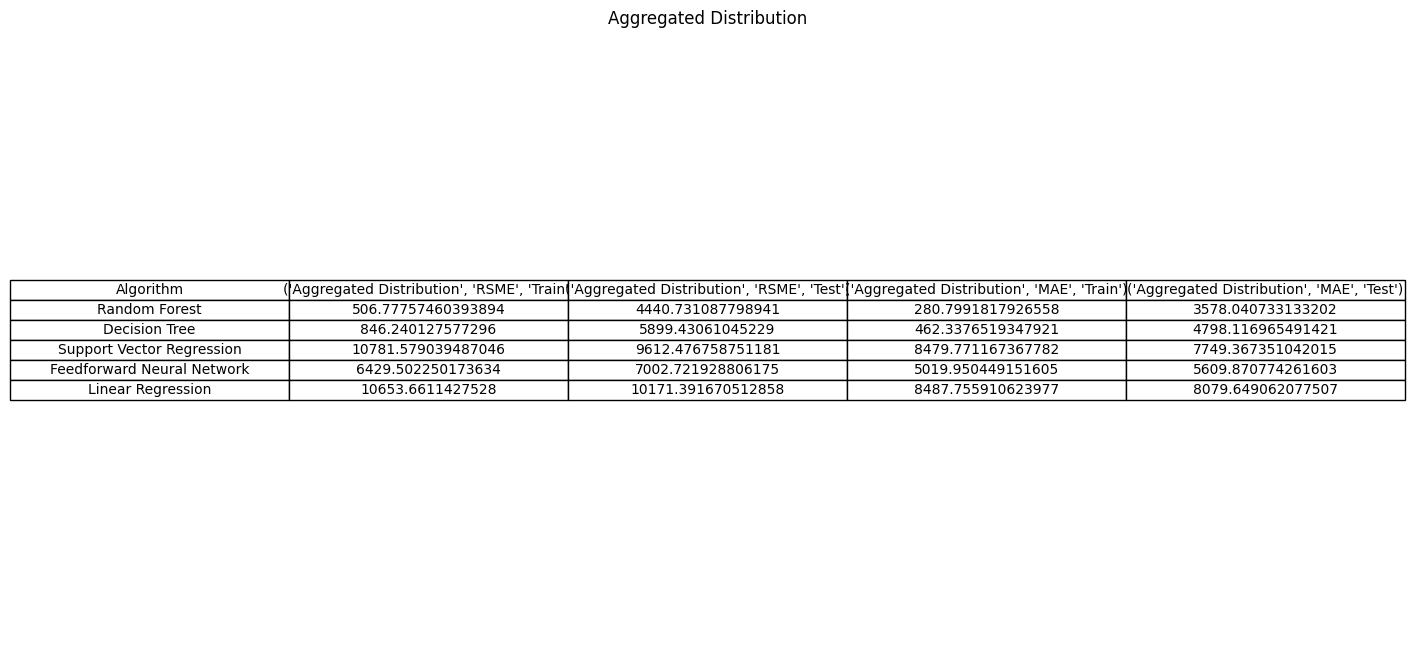

In [15]:
# Function to compute RMSE and MAE for a given model
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    # Prediction for train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # RMSE for train and test
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    # MAE for train and test
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    return rmse_train, rmse_test, mae_train, mae_test

# Performance metrics calculation for all tests
performance_metrics = {}
for model_name, trained_model in trained_models.items():
    rmse_train, rmse_test, mae_train, mae_test = evaluate_model_performance(trained_model, X_train, X_test, y_train, y_test)
    performance_metrics[model_name] = {
        'RMSE_Train': rmse_train,
        'RMSE_Test': rmse_test,
        'MAE_Train': mae_train,
        'MAE_Test': mae_test
    }

# Performance metrics for FFNN
y_train_pred_nn = neural_network.predict(X_train).flatten()  # training predictions and flatten
y_test_pred_nn = neural_network.predict(X_test).flatten()  # test predictions and flatten
performance_metrics["FFNN"] = {
    'RMSE_Train': np.sqrt(mean_squared_error(y_train, y_train_pred_nn)),
    'RMSE_Test': np.sqrt(mean_squared_error(y_test, y_test_pred_nn)),
    'MAE_Train': mean_absolute_error(y_train, y_train_pred_nn),
    'MAE_Test': mean_absolute_error(y_test, y_test_pred_nn)    
}

import random
import matplotlib.pyplot as plt

distribution_names = ['Quads Distribution', 'Smir Distribution', 'Boussafou Distribution', 'Aggregated Distribution']

# Displaying metrics for each distribution in a table format
for distribution in distribution_names:
    # Create a multi-index for columns: distribution name, metric type (RMSE, MAE), and dataset (Train, Test)
    multi_index_columns = pd.MultiIndex.from_product([[distribution], ['RMSE', 'MAE'], ['Train', 'Test']])
    # Initializing DataFrame with the multi-index columns
    metrics_dataframe = pd.DataFrame(columns=multi_index_columns)
    
    # Populating the DataFrame with metrics for each model
    for model_name, model_metrics in performance_metrics.items():
        metrics_dataframe.loc[model_name, (distribution, 'RMSE', 'Train')] = model_metrics['RMSE_Train']
        metrics_dataframe.loc[model_name, (distribution, 'RMSE', 'Test')] = model_metrics['RMSE_Test']
        metrics_dataframe.loc[model_name, (distribution, 'MAE', 'Train')] = model_metrics['MAE_Train']
        metrics_dataframe.loc[model_name, (distribution, 'MAE', 'Test')] = model_metrics['MAE_Test']

    # Ploting DataFrame as a table
    fig, ax = plt.subplots(figsize=(15, 8)) 
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=metrics_dataframe.values, colLabels=metrics_dataframe.columns, rowLabels=metrics_dataframe.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2) 
    plt.title(f"Metrics for {distribution}")
    plt.show()

**Detailed Analysis of Results is given in the Report**

## Conlusion

The approach and findings of the original study are successfully reproduced in this Jupyter notebook, proving the efficacy of several machine learning models for predicting power consumption. The inherent unpredictability in machine learning studies makes exact replication of numerical results difficult, but the reproduced results follow the methodology of the original study. The resilience and precision of Random Forest is highlighted by its excellent performance across all distributions. This notebook demonstrates the practical application of machine learning models in real-world contexts and emphasises the significance of reproducibility in scientific research.